<a href="https://colab.research.google.com/github/shanikairoshi/Deep-Unfolded_QML/blob/main/DQSVC_Genomic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer
!pip install genomic-benchmarks

from IPython.display import clear_output
clear_output()

In [7]:
from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)
print(f"Number of samples in the test set: {len(test_set)}")
print(f"Number of samples in the test set: {len(train_set)}")
from collections import defaultdict
import numpy as np


# Filter out sequences that consist entirely of "N"
filtered_data_set = [sample for sample in data_set if not all(base == 'N' for base in sample[0])]

print(f"Filtered data set size: {len(filtered_data_set)}")
print("One sample from the filtered data set:")
print(filtered_data_set[0])

word_size = 40
word_combinations = defaultdict(int)
iteration = 1
for text, _ in filtered_data_set:
    for i in range(len(text)):
        word = text[i:i+word_size]
        if word_combinations.get(word) is None:
          word_combinations[word] = iteration
          iteration += 1


print("\nFirst 5 samples in the word_combinations dict.")
for key, value in list(word_combinations.items())[:5]:
    print(key, value)

import numpy as np
# Preprocess the training set
np_data_set = []
for i in range(len(data_set)):
    sequence, label = data_set[i]
    sequence = sequence.strip()  # Remove any leading/trailing whitespace
    words = [sequence[i:i + word_size] for i in range(0, len(sequence), word_size)]  # Split the sequence into 4-letter words
    int_sequence = np.array([word_combinations[word] for word in words])
    data_point = {'sequence': int_sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set[:5]

np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set[:5]


from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)
from sklearn.decomposition import PCA
# Apply PCA to reduce dimensionality of the scaled data
pca = PCA(n_components=2)  # Reduce to 2 components; adjust this number as needed
sequences_pca = pca.fit_transform(sequences_scaled)

# Update the sequences in np_data_set with the PCA-transformed sequences
for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_pca[i]

# Shuffle the dataset again after transformation
np.random.shuffle(np_data_set)

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]

np_train_data = np_data_set[:200]
np_test_data = np_data_set[-20:]

print(f"Length of np_train_data: {len(np_train_data)}")
print(f"Length of np_test_data: {len(np_test_data)}")

# Extract the PCA-transformed sequences and labels
train_sequences = np.array([data_point["sequence"] for data_point in np_train_data])
train_labels = np.array([data_point["label"] for data_point in np_train_data])

test_sequences = np.array([data_point["sequence"] for data_point in np_test_data])
test_labels = np.array([data_point["label"] for data_point in np_test_data])

print(f"Shape of reduced train_sequences: {train_sequences.shape}")
print(f"Shape of reduced test_sequences: {test_sequences.shape}")

# Setup feature map and ansatz for VQC
num_features = train_sequences.shape[1]
##feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

from sklearn.preprocessing import MinMaxScaler

#features = MinMaxScaler().fit_transform(num_features)
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
data_train, data_test, data_train_labels, data_test_labels  = train_test_split(
    train_sequences, train_labels, train_size=0.8, random_state=algorithm_globals.random_seed
)



Number of samples in the test set: 25000
Number of samples in the test set: 75000
Filtered data set size: 73118
One sample from the filtered data set:
('TGATTCCGATGAACAGACATCGCCAACTGAAGATGTTGGGACATCTGTACACCTTGTGCGTGGACCAGATGGAACTCCACTTCCTACTGATGCTTCGGGATCTGCAATTGGACCAGACGGAGAAGTCATTCCTACTGATGAGAATGGTGTTCCATTGGATAAAGATGGTTCTCCTCTTCCTACTGACAACAATGGAAACT', 0)

First 5 samples in the word_combinations dict.
TGATTCCGATGAACAGACATCGCCAACTGAAGATGTTGGG 1
GATTCCGATGAACAGACATCGCCAACTGAAGATGTTGGGA 2
ATTCCGATGAACAGACATCGCCAACTGAAGATGTTGGGAC 3
TTCCGATGAACAGACATCGCCAACTGAAGATGTTGGGACA 4
TCCGATGAACAGACATCGCCAACTGAAGATGTTGGGACAT 5
First 5 samples of encoded data:
First 5 samples of encoded shuffled data:
First 5 samples of scaled encoded shuffled data:
Length of np_train_data: 200
Length of np_test_data: 20
Shape of reduced train_sequences: (200, 2)
Shape of reduced test_sequences: (20, 2)


Updated code revision

### Setting 01:
### - Featuremap - Zfeaturemap
### - Entanglement -Full
### - Repetitions  - 3

<ipython-input-9-1d6a10322202>:29: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Feature map parameters: 2, Phi length: 2
Before binding: ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])

Iteration 1

Iteration 1
Phi values used for iteration 1: [0.16505104 0.12749613]
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])
Phi values used: [0.16505104 0.12749613]
Iteration 1: Cost = -3.009989364000344, Accuracy = 0.825, Phi Update Norm = 0.00999999994154497

Iteration 2

Iteration 2
Phi values used for iteration 2: [0.1729649  0.13360931]
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])
Phi values used: [0.1729649  0.13360931]
Iteration 2: Cost = -3.0130076935424004, Accuracy = 0.825, Phi Update Norm = 0.009999999929470973

Iteration 3

Iteration 3
Phi values used for iteration 3: [0.18087875 0.13972248]
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi

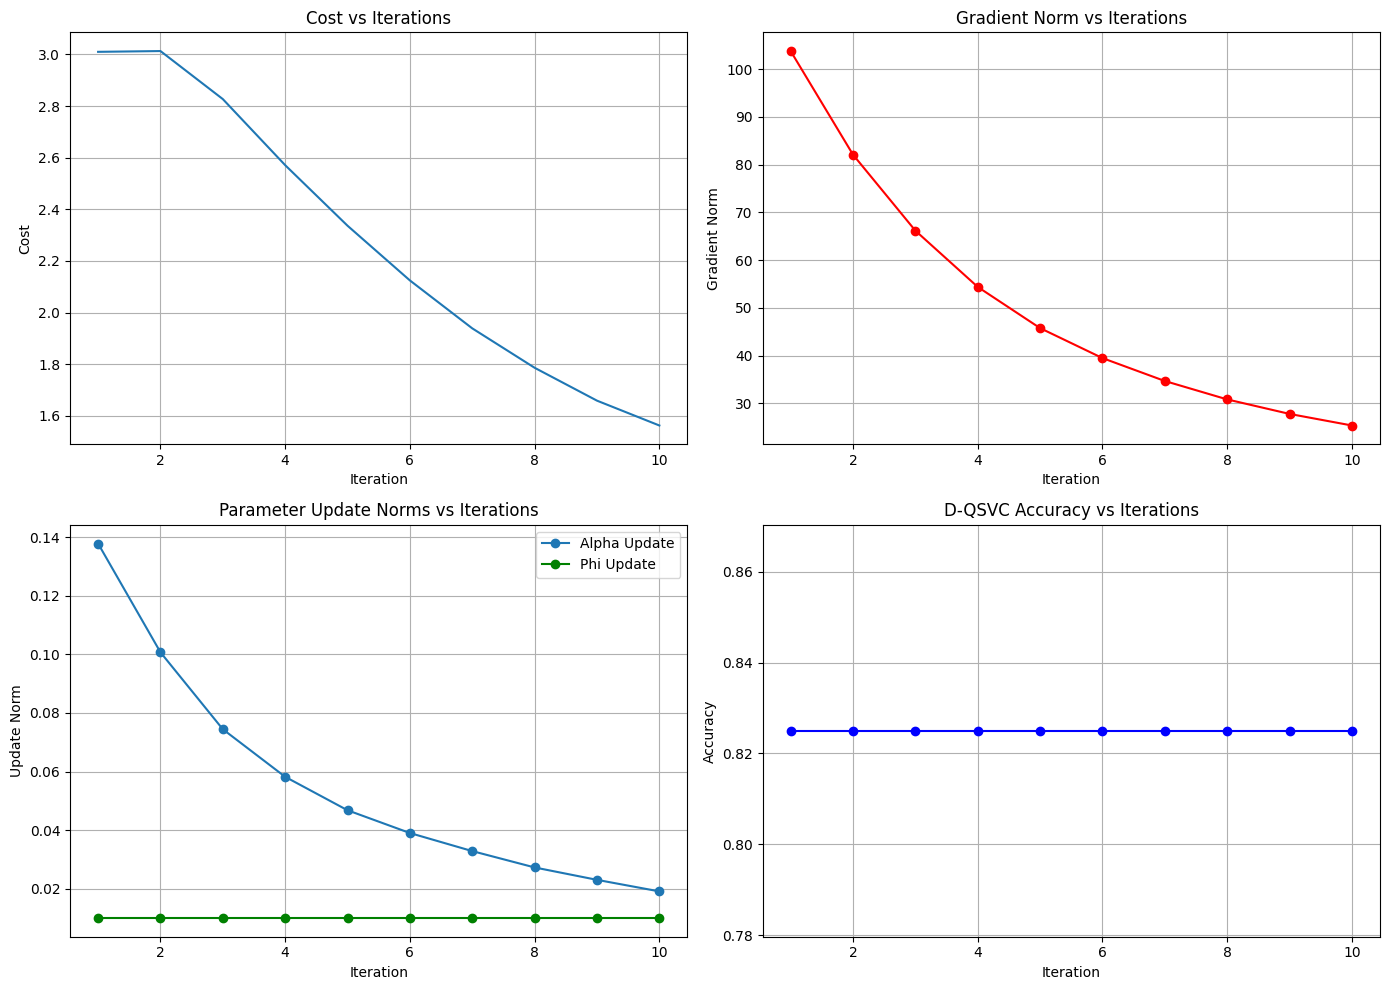

In [9]:
# Necessary imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
from copy import deepcopy
import csv
import time
from qiskit.circuit import ParameterVector

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Define quantum feature map with trainable parameters
feature_dim = data_train.shape[1]
feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=3,parameter_prefix="phi")
# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate for alphas
eta_phi = 0.01  # Learning rate for phis
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1
phis = np.random.randn(feature_dim) * 0.1
reps=3
# Create symbolic parameters
phi_params = ParameterVector('phi', feature_dim)
# Feature map with symbolic parameters



# Compute the gradient of the cost function with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Update rule for alphas
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis.sum())

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

def compute_gradient_wrt_phi(grad_alpha, phis):
    # Ensure compatibility by taking the mean along axis 0 if necessary
    if grad_alpha.shape[0] != len(phis):
        grad_alpha = grad_alpha.mean(axis=0)  # Calculate the mean along axis 0

    # Dot product operation
    return np.dot(grad_alpha, phis)

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results_genome_full_Z.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])

# Track metrics
costs, grad_norms, alpha_update_norms, phi_update_norms, accuracies = [], [], [], [], []
previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=reps, parameter_prefix="phi")
print(f"Feature map parameters: {len(feature_map.parameters)}, Phi length: {len(phis)}")
# Show initial parameters
print(f"Before binding: {feature_map.parameters}")
# Deep unfolding optimization loop

t0=time.time()
for t in range(T):
    print(f"\nIteration {t+1}")

    # Update phis as a numpy array (not binding)
    print(f"\nIteration {t+1}")

    #phis = np.random.randn(feature_dim) * 0.1
    print(f"Phi values used for iteration {t+1}: {phis}")

    # Create a new feature map with the updated phi values
    feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=3, parameter_prefix="phi")

    if len(phis) != len(feature_map.parameters):
       raise ValueError(f"Mismatch: phis has {len(phis)} values, but feature_map expects {len(feature_map.parameters)} parameters.")


    # Show parameters without binding
    print(f"Feature map parameters (symbolic): {feature_map.parameters}")

    # Evaluate kernel using symbolic feature map and numerical values
    kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
    kernel_matrix = kernel.evaluate(data_train)

    print(f"Phi values used: {phis}")
    # Compute gradients
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas and phis
    alphas = update_alphas(alphas, grad_alpha, phis, eta)
    alphas = np.clip(alphas, 0, C)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    phis -= eta_phi * grad_phi / (np.linalg.norm(grad_phi) + 1e-8)

    # Compute norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Update previous values
    previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

    # Compute cost
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Retrain QSVC with updated kernel
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save results to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis.tolist()])

    print(f"Iteration {t+1}: Cost = {cost}, Accuracy = {accuracy}, Phi Update Norm = {phi_update_norm}")

t1=time.time()
print(f"Time taken genome DQSVC: {t1-t0}")
# Final evaluation
qsvc.fit(data_train, data_train_labels)
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"Final D-QSVC Test Accuracy: {dqsvc_score_test}")
print(f"Final D-QSVC Train Accuracy: {dqsvc_score_train}")

# Plotting metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), [abs(cost) for cost in costs])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, T+1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, T+1), alpha_update_norms, marker='o', label='Alpha Update')
plt.plot(range(1, T+1), phi_update_norms, marker='o', label='Phi Update', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.legend()
plt.title('Parameter Update Norms vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, T+1), accuracies, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('D-QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

### Setting 01:
### - Featuremap - ZZfeaturemap
### - Entanglement -linear
### - Repetitions  - 3

In [ ]:
# Necessary imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
from copy import deepcopy
import csv
import time
from qiskit.circuit import ParameterVector

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Define quantum feature map with trainable parameters
feature_dim = data_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear", parameter_prefix="phi")
# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate for alphas
eta_phi = 0.01  # Learning rate for phis
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1
phis = np.random.randn(feature_dim) * 0.1
reps=3
# Create symbolic parameters
phi_params = ParameterVector('phi', feature_dim)
# Feature map with symbolic parameters



# Compute the gradient of the cost function with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Update rule for alphas
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis.sum())

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

def compute_gradient_wrt_phi(grad_alpha, phis):
    # Ensure compatibility by taking the mean along axis 0 if necessary
    if grad_alpha.shape[0] != len(phis):
        grad_alpha = grad_alpha.mean(axis=0)  # Calculate the mean along axis 0

    # Dot product operation
    return np.dot(grad_alpha, phis)

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results_genome_full_ZZ.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])

# Track metrics
costs, grad_norms, alpha_update_norms, phi_update_norms, accuracies = [], [], [], [], []
previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

#feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=reps, entanglement="linear", parameter_prefix="phi")
print(f"Feature map parameters: {len(feature_map.parameters)}, Phi length: {len(phis)}")
# Show initial parameters
print(f"Before binding: {feature_map.parameters}")
# Deep unfolding optimization loop

t0=time.time()
for t in range(T):
    print(f"\nIteration {t+1}")

    # Update phis as a numpy array (not binding)
    print(f"\nIteration {t+1}")

    #phis = np.random.randn(feature_dim) * 0.1
    print(f"Phi values used for iteration {t+1}: {phis}")

    # Create a new feature map with the updated phi values
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear", parameter_prefix="phi")

    if len(phis) != len(feature_map.parameters):
       raise ValueError(f"Mismatch: phis has {len(phis)} values, but feature_map expects {len(feature_map.parameters)} parameters.")


    # Show parameters without binding
    print(f"Feature map parameters (symbolic): {feature_map.parameters}")

    # Evaluate kernel using symbolic feature map and numerical values
    kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
    kernel_matrix = kernel.evaluate(data_train)

    print(f"Phi values used: {phis}")
    # Compute gradients
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas and phis
    alphas = update_alphas(alphas, grad_alpha, phis, eta)
    alphas = np.clip(alphas, 0, C)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    phis -= eta_phi * grad_phi / (np.linalg.norm(grad_phi) + 1e-8)

    # Compute norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Update previous values
    previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

    # Compute cost
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Retrain QSVC with updated kernel
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save results to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis.tolist()])

    print(f"Iteration {t+1}: Cost = {cost}, Accuracy = {accuracy}, Phi Update Norm = {phi_update_norm}")

t1=time.time()
print(f"Time taken genome DQSVC: {t1-t0}")
# Final evaluation
qsvc.fit(data_train, data_train_labels)
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"Final D-QSVC Test Accuracy: {dqsvc_score_test}")
print(f"Final D-QSVC Train Accuracy: {dqsvc_score_train}")

# Plotting metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), [abs(cost) for cost in costs])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, T+1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, T+1), alpha_update_norms, marker='o', label='Alpha Update')
plt.plot(range(1, T+1), phi_update_norms, marker='o', label='Phi Update', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.legend()
plt.title('Parameter Update Norms vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, T+1), accuracies, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('D-QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

2


In [ ]:
# Necessary imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
from copy import deepcopy
import csv
import time
from qiskit.circuit import ParameterVector

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Define quantum feature map with trainable parameters
feature_dim = data_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear", parameter_prefix="phi")
# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 1.0  # Regularization parameter
eta = 0.01  # Learning rate for alphas
eta_phi = 0.01  # Learning rate for phis
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1
phis = np.random.randn(feature_dim) * 0.1
reps=3
# Create symbolic parameters
phi_params = ParameterVector('phi', feature_dim)
# Feature map with symbolic parameters



# Compute the gradient of the cost function with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Update rule for alphas
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis.sum())

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

def compute_gradient_wrt_phi(grad_alpha, phis):
    # Ensure compatibility by taking the mean along axis 0 if necessary
    if grad_alpha.shape[0] != len(phis):
        grad_alpha = grad_alpha.mean(axis=0)  # Calculate the mean along axis 0

    # Dot product operation
    return np.dot(grad_alpha, phis)

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results_genome_full_ZZ.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])

# Track metrics
costs, grad_norms, alpha_update_norms, phi_update_norms, accuracies = [], [], [], [], []
previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

#feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=reps, entanglement="linear", parameter_prefix="phi")
print(f"Feature map parameters: {len(feature_map.parameters)}, Phi length: {len(phis)}")
# Show initial parameters
print(f"Before binding: {feature_map.parameters}")
# Deep unfolding optimization loop

t0=time.time()
for t in range(T):
    print(f"\nIteration {t+1}")

    # Update phis as a numpy array (not binding)
    print(f"\nIteration {t+1}")

    #phis = np.random.randn(feature_dim) * 0.1
    print(f"Phi values used for iteration {t+1}: {phis}")

    # Create a new feature map with the updated phi values
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="circular", parameter_prefix="phi")

    if len(phis) != len(feature_map.parameters):
       raise ValueError(f"Mismatch: phis has {len(phis)} values, but feature_map expects {len(feature_map.parameters)} parameters.")


    # Show parameters without binding
    print(f"Feature map parameters (symbolic): {feature_map.parameters}")

    # Evaluate kernel using symbolic feature map and numerical values
    kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
    kernel_matrix = kernel.evaluate(data_train)

    print(f"Phi values used: {phis}")
    # Compute gradients
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas and phis
    alphas = update_alphas(alphas, grad_alpha, phis, eta)
    alphas = np.clip(alphas, 0, C)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    phis -= eta_phi * grad_phi / (np.linalg.norm(grad_phi) + 1e-8)

    # Compute norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Update previous values
    previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

    # Compute cost
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Retrain QSVC with updated kernel
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save results to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis.tolist()])

    print(f"Iteration {t+1}: Cost = {cost}, Accuracy = {accuracy}, Phi Update Norm = {phi_update_norm}")

t1=time.time()
print(f"Time taken genome DQSVC: {t1-t0}")
# Final evaluation
qsvc.fit(data_train, data_train_labels)
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"Final D-QSVC Test Accuracy: {dqsvc_score_test}")
print(f"Final D-QSVC Train Accuracy: {dqsvc_score_train}")

# Plotting metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), [abs(cost) for cost in costs])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, T+1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, T+1), alpha_update_norms, marker='o', label='Alpha Update')
plt.plot(range(1, T+1), phi_update_norms, marker='o', label='Phi Update', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.legend()
plt.title('Parameter Update Norms vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, T+1), accuracies, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('D-QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Function to plot the data distribution
def plot_data_distribution(train_data, train_labels, test_data, test_labels, title, subtitle):
    plt.figure(figsize=(10, 6))

    # Scatter plot for training data
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap='viridis', label="Training Data", marker='o')

    # Scatter plot for test data
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='coolwarm', label="Test Data", marker='x')

    plt.title(f"{title}: {subtitle}")
    plt.xlabel("Feature 1 (PCA Component)")
    plt.ylabel("Feature 2 (PCA Component)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Before training plot (initial distribution of training/test data)
plot_data_distribution(data_train, data_train_labels, data_test, data_test_labels,
                       title="Data Distribution", subtitle="Before Model Training")

# After training plot (let's assume no data transformation after training but you can add predicted labels here)
plot_data_distribution(data_train, data_train_labels, data_test, data_test_labels,
                       title="Data Distribution", subtitle="After Model Training")


In [ ]:

from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
#from qiskit_machine_learning.kernels import FidelityQuantumKernel,QuantumKernel
from qiskit_machine_learning.kernels import FidelityQuantumKernel
import time
#from qiskit import BasicAer#
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
#from qiskit_machine_learning.datasets import iris
from qiskit_machine_learning.circuit.library import RawFeatureVector
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.algorithms import QSVC
# Variables to track objective function and learning rate
objective_func_vals = []
learning_rates = []
perturbations = []
initial_learning_rate = 0.15  # Starting learning rate
initial_perturbation = 0.15  # Starting perturbation value
momentum = 0.95  # Momentum factor for smoother learning rate adjustments
gradient_moving_avg = 0  # Moving average of gradients


# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)

import matplotlib.pyplot as plt
import numpy as np

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
print(feature_map.num_qubits)

qsvc=QSVC(quantum_kernel=kernel)
t0=time.time()
qsvc.fit(data_train, data_train_labels)
t1=time.time()
print(f"Training time qsvc _genome: {t1-t0}")
qsvc_score_test=qsvc.score(data_test, data_test_labels )
print(f"QSVC classification test score: {qsvc_score_test}")

qsvc_score_train=qsvc.score(data_train, data_train_labels)
print(f"QSVC classification train score: {qsvc_score_train}")
#print(f"Time taken :{t1-t0}")

<ipython-input-3-5aeea49d8075>:38: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


2
Training time qsvc: 34.040661096572876
QSVC classification test score: 0.925
QSVC classification train score: 0.91875


DQSVC _Old

In [ ]:
# Necessary imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
import csv  # Import CSV for saving results

#data_train, data_test, data_train_labels, data_test,data_test_labels

# Set seed for reproducibility
algorithm_globals.random_seed = 12345

# Split dataset into training and test sets
#X, Y = features, labels
#train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1, random_state=seed)

# Quantum feature map
feature_dim =data_train.shape[1] #
print(f"Feature Dimention: {feature_dim}")
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 0.75  # Regularization parameter smaller regularize will encourage a simpler decision boundary c=0.1
eta = 0.01  # Learning rate
eta_phi = 0.01  # Learning rate for phis
alphas = np.zeros(data_train_labels.shape)  # Initialize alpha coefficients
phis = np.random.randn(data_train_labels.shape[0])  # Initialize unfolding parameters

# Define the cost function gradient with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Define the update rule for alphas based on deep unfolding
def update_alphas(alphas, grad, phis, eta):
    # Alphas update modulated by phis
    return alphas - eta * grad * np.tanh(phis)  # Phis influence the alpha update step

# Construct the quantum kernel matrix
kernel_matrix = kernel.evaluate(data_train)

# Initialize alphas and phis with small random values
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1  # Small random initialization for alphas
phis = np.random.randn(data_train_labels.shape[0]) * 0.1  # Small random initialization for phis

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

# Define the gradient of cost with respect to phis
def compute_gradient_wrt_phi(grad_alpha, phis):
    # Placeholder: Approximate influence of phis on the alpha update step
    return np.dot(grad_alpha, phis)  # Simplified dependency

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results_genomic.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the headers for each column
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])


# Add lists to track the gradient norms, parameter update norms, and classification accuracy
grad_norms = []
alpha_update_norms = []
phi_update_norms = []
accuracies = []

# Track costs for visualization
costs = []

# Initialize previous values of alphas and phis for tracking updates
previous_alphas = np.copy(alphas)
previous_phis = np.copy(phis)

# Deep unfolding optimization loop with updates and learning rate adjustment
for t in range(T):
    print(f"Iteration {t+1}/{T}")

    # Compute the gradient of the cost function with respect to alphas
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)

    # Compute gradient norm
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas using deep unfolding rule where phis modulate the update step
    alphas = update_alphas(alphas, grad_alpha, phis, eta)

    # Ensure constraints are met: 0 <= alpha_i <= C
    alphas = np.clip(alphas, 0, C)

    # Ensure sum(alpha_i * y_i) = 0 constraint (more robust adjustment)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    # Compute the gradient of the cost function with respect to phis
    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)

    # Update phis based on the gradient of the cost
    phis -= eta_phi * grad_phi



    # Compute parameter update norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Store the current values of alphas and phis for the next iteration
    previous_alphas = np.copy(alphas)
    previous_phis = np.copy(phis)

    # Compute and store the cost for this iteration
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Adjust the learning rate dynamically based on gradient norms (deep unfolding principle)
    eta = max(0.0001, eta + 0.001 * np.linalg.norm(grad_alpha))  # Adjust eta dynamically
    eta_phi = max(0.0001, eta_phi + 0.001 * np.linalg.norm(grad_phi))  # Adjust eta_phi dynamically

    # After the current iteration, fit the QSVC model and evaluate its accuracy
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test,data_test_labels)
    accuracies.append(accuracy)

    # Save the results to the .csv file after each iteration
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis])


    print(f"Cost at iteration {t+1}: {cost}")
    print(f"Gradient norm at iteration {t+1}: {grad_norm}")
    print(f"Alpha update norm at iteration {t+1}: {alpha_update_norm}")
    print(f"Phi update norm at iteration {t+1}: {phi_update_norm}")
    print(f"QSVC accuracy at iteration {t+1}: {accuracy}")
    print(f"Phis at iteration {t+1}: {phis}")

# After deep unfolding, use the final alphas to train the QSVC model
qsvc.fit(data_train, data_train_labels)

# Evaluate QSVC
dqsvc_score_test = qsvc.score(data_test,data_test_labels)
print(f"DSVC classification test score after deep unfolding: {dqsvc_score_test}")

dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"DQSVC classification train score after deep unfolding: {dqsvc_score_train}")

# Plotting the cost values over the iterations
plt.figure(figsize=(12, 6))

# Plot gradient norm over iterations
plt.subplot(2, 2, 2)
plt.plot(range(1, len(grad_norms) + 1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

# Plot alpha and phi update norms over iterations
plt.subplot(2, 2, 3)
plt.plot(range(1, len(alpha_update_norms) + 1), alpha_update_norms, marker='o', label='Alpha Updates')
plt.plot(range(1, len(phi_update_norms) + 1), phi_update_norms, marker='o', label='Phi Updates', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.title('Parameter Update Norms vs Iterations')
plt.legend()
plt.grid(True)

# Plot classification accuracy over iterations
plt.subplot(2, 2, 4)
qsvc_accuracies = [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]  # Placeholder for baseline QSVC accuracies
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',  color='g', label="D-QSVC")
plt.plot(range(1, len(qsvc_accuracies) + 1), qsvc_accuracies, marker='o', color='b', label="QSVC")
plt.xlabel('Iteration')
plt.ylabel('QSVC Accuracy')
plt.title('QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

'''

from qiskit import Aer
from qiskit.primitives import Sampler

# Specify the backend explicitly (if needed)
backend = Aer.get_backend('qasm_simulator')

# Create the sampler with the specified backend
sampler = Sampler(backend=backend)
'''


Genome data

<ipython-input-7-0ebea9d417bd>:32: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Feature map parameters: 2, Phi length: 2
Before binding: ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])

Iteration 1
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])
Phi values used: [ 0.09989349 -0.11832902]
Iteration 1: Cost = -2.6073224114075897, Accuracy = 1.0, Phi Update Norm = 0.21795445997745344

Iteration 2
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])
Phi values used: [-0.02772517  0.06191146]
Iteration 2: Cost = -1.6647527805059372, Accuracy = 1.0, Phi Update Norm = 0.24062314904209062

Iteration 3
Feature map parameters (symbolic): ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1])])
Phi values used: [ 0.02669676 -0.10526537]
Iteration 3: Cost = -1.111091208019743, Accuracy = 1.0, Phi Update Norm = 0.19573387911888473

Iteration 4
Feature map parameters (symbolic): ParameterView([Par

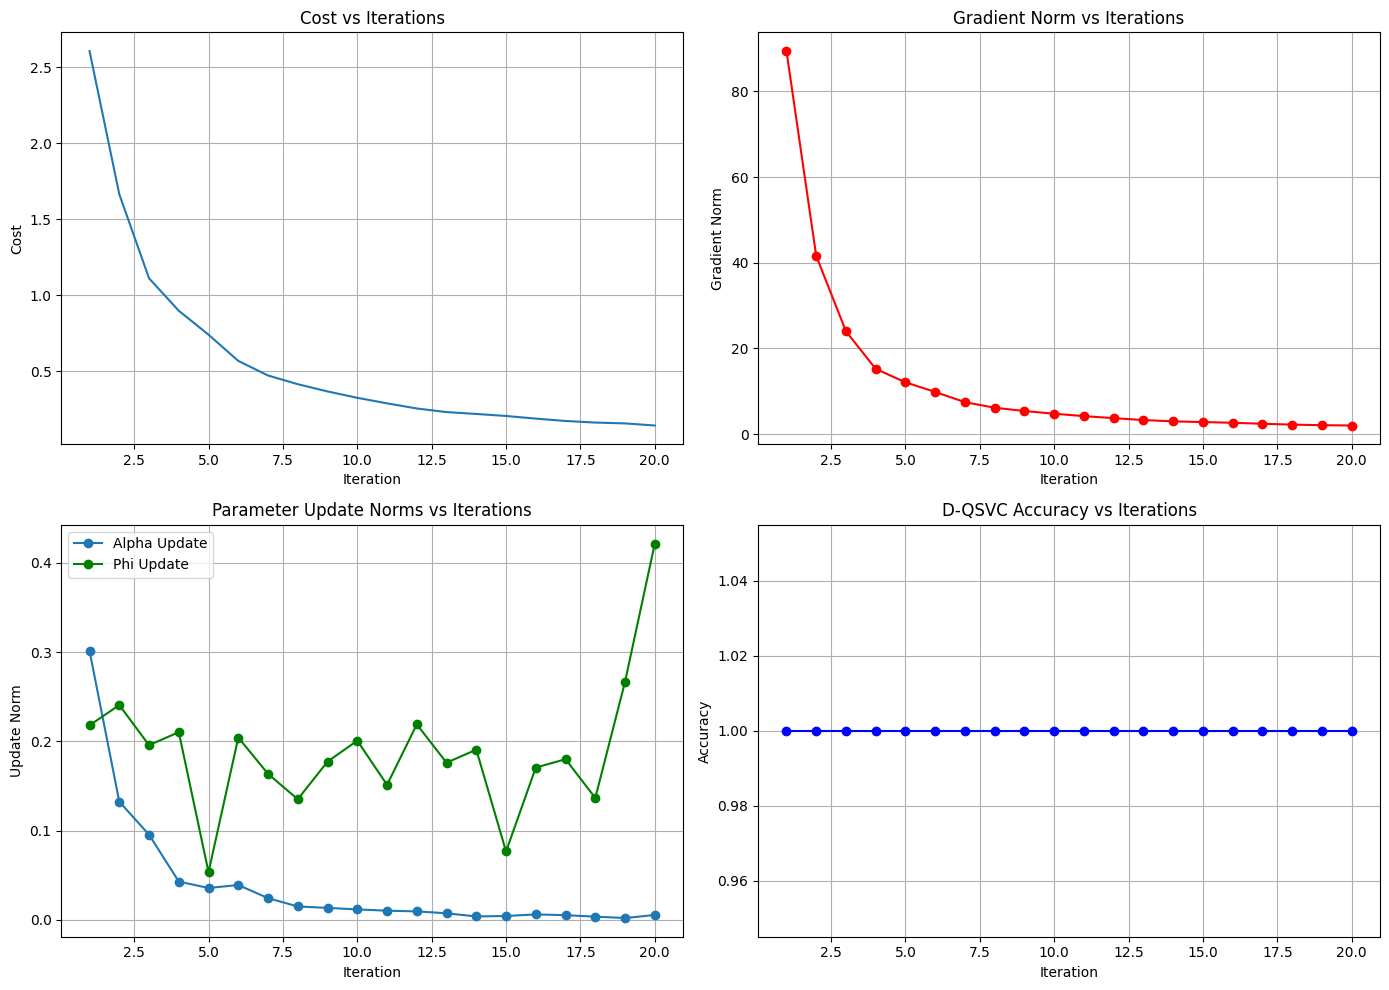

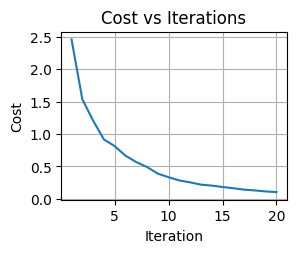

In [ ]:

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), [abs(cost) for cost in costs])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

updated code - 20/02/2025  in  current implementation, the updated phis values are indeed used in the next iteration of deep unfolding, but there's a subtle issue that prevents them from fully influencing the kernel matrix:

Iris data

In [ ]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
from copy import deepcopy
import csv

from qiskit.circuit import ParameterVector

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed


# Define quantum feature map with trainable parameters
feature_dim = data_train.shape[1]
phis_params = ParameterVector('phi', feature_dim)

# Create ZZFeatureMap with custom parameters
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="linear", parameter_prefix="phi")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=kernel)

# Define deep unfolding parameters
T = 10  # Number of unfolding iterations
C = 0.5  # Regularization parameter
eta = 0.01  # Learning rate for alphas
eta_phi = 0.01  # Learning rate for phis
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1
phis = np.random.randn(feature_dim) * 0.1
reps=3
# Create symbolic parameters
phi_params = ParameterVector('phi', feature_dim)
# Feature map with symbolic parameters
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="linear", parameter_prefix="phi")


# Compute the gradient of the cost function with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Update rule for alphas
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis.sum())

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

def compute_gradient_wrt_phi(grad_alpha, phis):
    # Ensure compatibility by taking the mean along axis 0 if necessary
    # Compute overall gradient (sum or mean)
    if grad_alpha.shape[0] != len(phis):
        grad_alpha = grad_alpha.mean(axis=0)  # Calculate the mean along axis 0

    # Dot product operation # Scale each phi by the mean gradient
    return np.dot(grad_alpha, phis)


# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])

# Track metrics
costs, grad_norms, alpha_update_norms, phi_update_norms, accuracies = [], [], [], [], []
previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=reps, entanglement="linear", parameter_prefix="phi")
print(f"Feature map parameters: {len(feature_map.parameters)}, Phi length: {len(phis)}")
# Show initial parameters
print(f"Before binding: {feature_map.parameters}")
# Deep unfolding optimization loop

import time

# Start measuring execution time
start_time = time.time()

# Deep unfolding optimization loop
for t in range(T):
    print(f"\nIteration {t+1}")

    # Evaluate kernel using symbolic feature map and numerical values
    kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
    kernel_matrix = kernel.evaluate(data_train)

    print(f"Phi values used: {phis}")

    # Compute gradients
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas and phis
    alphas = update_alphas(alphas, grad_alpha, phis, eta)
    alphas = np.clip(alphas, 0, C)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    phis -= eta_phi * grad_phi / (np.linalg.norm(grad_phi) + 1e-8)

    # Compute norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Update previous values
    previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

    # Compute cost
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Retrain QSVC with updated kernel
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save results to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis.tolist()])

    print(f"Iteration {t+1}: Cost = {cost}, Accuracy = {accuracy}, Phi Update Norm = {phi_update_norm}")

# End measuring execution time
end_time = time.time()
training_time = end_time - start_time

print(f"\nTotal Training Time: {training_time:.2f} seconds")

# Final evaluation
qsvc.fit(data_train, data_train_labels)
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"Final D-QSVC Test Accuracy: {dqsvc_score_test}")
print(f"Final D-QSVC Train Accuracy: {dqsvc_score_train}")

# Save training time to CSV
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Total Training Time", training_time])


# Plotting metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), costs, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, T+1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, T+1), alpha_update_norms, marker='o', label='Alpha Update')
plt.plot(range(1, T+1), phi_update_norms, marker='o', label='Phi Update', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.legend()
plt.title('Parameter Update Norms vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, T+1), accuracies, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('D-QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-6-945bf82e4009>:34: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Feature map parameters: 4, Phi length: 4
Before binding: ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1]), ParameterVectorElement(phi[2]), ParameterVectorElement(phi[3])])

Iteration 1


KeyboardInterrupt: 

In [ ]:
# Necessary imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
from qiskit.circuit import Parameter, ParameterVector
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_algorithms.utils import algorithm_globals
from copy import deepcopy
import csv

# Set random seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Load dataset and split into training and test sets
iris = load_iris()
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]  # Binary classification
X = MinMaxScaler().fit_transform(X)
data_train, data_test, data_train_labels, data_test_labels = train_test_split(X, y, test_size=0.3, random_state=seed)

# Define quantum feature map with trainable parameters
feature_dim = data_train.shape[1]
phis_params = ParameterVector('phi', feature_dim)

# Create ZZFeatureMap with custom parameters
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1, entanglement="linear", parameter_prefix="phi")

# Quantum kernel setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
#kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map) move to inside the loop

# Initialize QSVC
qsvc = QSVC()
#quantum_kernel=kernel remove it

# Define deep unfolding parameters
T = 20  # Number of unfolding iterations
C = 0.5  # Regularization parameter
eta = 0.01  # Learning rate for alphas
eta_phi = 0.01  # Learning rate for phis
alphas = np.random.rand(data_train_labels.shape[0]) * 0.1
phis = np.random.randn(feature_dim) * 0.1

# Compute the gradient of the cost function with respect to alphas
def compute_gradient(alphas, kernel_matrix, labels):
    grad = np.zeros_like(alphas)
    for i in range(len(alphas)):
        for j in range(len(alphas)):
            grad[i] += alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
    return grad - np.sum(alphas)

# Update rule for alphas
def update_alphas(alphas, grad, phis, eta):
    return alphas - eta * grad * np.tanh(phis.sum())

# Define the cost function
def compute_cost(alphas, kernel_matrix, labels):
    cost = 0.5 * np.sum([
        alphas[i] * alphas[j] * labels[i] * labels[j] * kernel_matrix[i, j]
        for i in range(len(alphas)) for j in range(len(alphas))
    ]) - np.sum(alphas)
    return cost

# Gradient with respect to phis
def compute_gradient_wrt_phi(grad_alpha, phis):
    return np.dot(grad_alpha, phis)

# Create a .csv file to save the results
csv_file = "deep_unfolding_qsvc_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Cost", "Gradient Norm", "Alpha Update Norm", "Phi Update Norm", "QSVC Accuracy", "Phis"])

# Track metrics
costs, grad_norms, alpha_update_norms, phi_update_norms, accuracies = [], [], [], [], []
previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

# Deep unfolding optimization loop
for t in range(T):
    print(f"Iteration {t+1}/{T}")

    # Deep copy the feature map to maintain parameter integrity
    #feature_map_copy = deepcopy(feature_map) #instead this
    # Instead of deepcopy, re-initialize the feature map with parameters
    feature_map_copy = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement="linear", parameter_prefix="phi")


    # Debugging: Check parameters before assignment
    print(f"Original parameters: {feature_map.parameters}")
    print(f"Copied parameters: {feature_map_copy.parameters}")

    # Update feature map with new phi values using existing parameters
    phi_dict = {param: phis[i] for i, param in enumerate(feature_map_copy.parameters)}
    print(f"Phi dict: {phi_dict}")

    feature_map_copy = feature_map_copy.assign_parameters(phi_dict)

    # Debugging: Check parameters after assignment
    print(f"Feature map parameters after assignment: {feature_map_copy.parameters}")
    print(f"Number of phis: {len(phis)}")

    # Recalculate kernel matrix with updated phis
    kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_copy)
    kernel_matrix = kernel.evaluate(data_train)

    # Compute gradients
    grad_alpha = compute_gradient(alphas, kernel_matrix, data_train_labels)
    grad_norm = np.linalg.norm(grad_alpha)
    grad_norms.append(grad_norm)

    # Update alphas and phis
    alphas = update_alphas(alphas, grad_alpha, phis, eta)
    alphas = np.clip(alphas, 0, C)
    alpha_sum = np.dot(alphas, data_train_labels)
    alphas -= alpha_sum / len(alphas)

    grad_phi = compute_gradient_wrt_phi(grad_alpha, phis)
    phis -= eta_phi * grad_phi / (np.linalg.norm(grad_phi) + 1e-8)

    # Compute norms
    alpha_update_norm = np.linalg.norm(alphas - previous_alphas)
    phi_update_norm = np.linalg.norm(phis - previous_phis)
    alpha_update_norms.append(alpha_update_norm)
    phi_update_norms.append(phi_update_norm)

    # Update previous values
    previous_alphas, previous_phis = np.copy(alphas), np.copy(phis)

    # Compute cost
    cost = compute_cost(alphas, kernel_matrix, data_train_labels)
    costs.append(cost)

    # Retrain QSVC with updated kernel
    qsvc.quantum_kernel = kernel # Set the quantum kernel here
    # Retrain QSVC with updated kernel
    qsvc.fit(data_train, data_train_labels)
    accuracy = qsvc.score(data_test, data_test_labels)
    accuracies.append(accuracy)

    # Save results to CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([t+1, cost, grad_norm, alpha_update_norm, phi_update_norm, accuracy, phis.tolist()])

    print(f"Iteration {t+1}: Cost = {cost}, Accuracy = {accuracy}, Phi Update Norm = {phi_update_norm}")

# Final evaluation
# Final evaluation
qsvc.quantum_kernel = kernel  # Set the quantum kernel for final evaluation
qsvc.fit(data_train, data_train_labels)
dqsvc_score_test = qsvc.score(data_test, data_test_labels)
dqsvc_score_train = qsvc.score(data_train, data_train_labels)
print(f"Final D-QSVC Test Accuracy: {dqsvc_score_test}")
print(f"Final D-QSVC Train Accuracy: {dqsvc_score_train}")

# Plotting metrics
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, T+1), costs, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(range(1, T+1), grad_norms, marker='o', color='r')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(range(1, T+1), alpha_update_norms, marker='o', label='Alpha Update')
plt.plot(range(1, T+1), phi_update_norms, marker='o', label='Phi Update', color='g')
plt.xlabel('Iteration')
plt.ylabel('Update Norm')
plt.legend()
plt.title('Parameter Update Norms vs Iterations')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(range(1, T+1), accuracies, marker='o', color='b')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('D-QSVC Accuracy vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-19-9fa799765bd1>:38: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
<ipython-input-19-9fa799765bd1>:43: QiskitMachineLearningWarning: 'No quantum kernel is provided, SamplerV1 based quantum kernel will be used.'
  qsvc = QSVC()


Iteration 1/20
Original parameters: ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1]), ParameterVectorElement(phi[2]), ParameterVectorElement(phi[3])])
Copied parameters: ParameterView([ParameterVectorElement(phi[0]), ParameterVectorElement(phi[1]), ParameterVectorElement(phi[2]), ParameterVectorElement(phi[3])])
Phi dict: {ParameterVectorElement(phi[0]): 0.12476726874475919, ParameterVectorElement(phi[1]): 0.03476087942043973, ParameterVectorElement(phi[2]): -0.05220986558209602, ParameterVectorElement(phi[3]): 0.08704453702039693}
Feature map parameters after assignment: ParameterView([])
Number of phis: 4


ValueError: The number of values (8) does not match the number of parameters (0) for the 0-th circuit.

v3

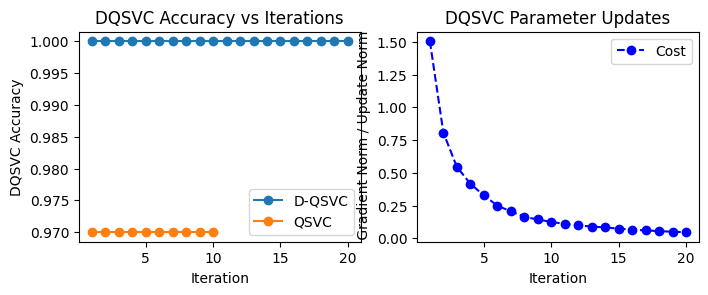

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the cost values over the iterations
plt.figure(figsize=(8, 6))

# Plot classification accuracy over iterations
plt.subplot(2, 2, 1)
qsvc_accuracies = [0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,0.97, 0.97,0.97]     # QSVC accuracies
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o',  color='#1f77b4', label="D-QSVC")
plt.plot(range(1, len(qsvc_accuracies) + 1), qsvc_accuracies, marker='o', color='#ff7f0e', label="QSVC")
plt.xlabel('Iteration')
plt.ylabel('DQSVC Accuracy')
plt.title('DQSVC Accuracy vs Iterations')
plt.legend()

# Plot gradient norm over iterations
plt.subplot(2, 2, 2)
# Plot gradient norm over iterations
plt.plot(range(1, len(costs) + 1), np.abs(costs), marker='o', label='Cost', color='b',linestyle='--')
# Plot alpha and phi update norms over iterations
#plt.plot(range(1, len(alpha_update_norms) + 1), alpha_update_norms, marker='o', label='Alpha Updates', color='#2ca02c')
#plt.plot(range(1, len(phi_update_norms) + 1), phi_update_norms, marker='o', label='Phi Updates', color='#d62728')
plt.xlabel('Iteration')
plt.ylabel(' Gradient Norm / Update Norm')
plt.title('DQSVC Parameter Updates')
# Add a legend to differentiate the plots
plt.legend()
plt.savefig('DQSVCIris cost and Parameter Updates.png', dpi=200)
# Display the combined plot
plt.show()


New code